# Simple Fuctions To Find And Plot OHLC Candle Plot For Stocks

## Sources
Idea for the code comes from this article<br>
https://www.statology.org/matplotlib-python-candlestick-chart/
<br>
<br>
I prefer this to the mpl finance one because this works better for customizing the plot after the fact than mpl finance. Additonally you can really adjust it to anything you want it to be.

### Import Packages

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

### Defining The plot_candles() Function
<br>
I have this set up to take in a DF with columns of 'high', 'close', 'open', 'low'
<br>
<br>
Adjustments to this can be made in the function

In [5]:
def plot_candles(df):
    df = df.reset_index(drop=True)

    up = df[df['close'] > df['open']]
    down = df[df['close'] < df['open']]
    same = df[df['close'] == df['open']]

    up_color = '#35ad31'
    down_color = '#de2626'
    same_color = '#b0b0b0'
    bar_width = df.index[1] - df.index[0]
    line_width = bar_width / 6
    
    if len(up) > 0:
        for index, row in up.iterrows():
            plt.bar(index, row.close - row.open, width = bar_width, bottom = row.open, edgecolor=up_color,color = 'white')
            plt.bar(index, row.high - row.close, width = line_width, bottom = row.close, color=up_color)
            plt.bar(index, row.low - row.open, width = line_width, bottom = row.open, color=up_color)
    if len(down) > 0:
        for index, row in down.iterrows():
            plt.bar(index, row.close - row.open, width = bar_width, bottom = row.open, color=down_color)
            plt.bar(index, row.high - row.close, width = line_width, bottom = row.close, color=down_color)
            plt.bar(index, row.low - row.open, width = line_width, bottom = row.open, color=down_color)
    if len(same) > 0:
        for index, row in same.iterrows():
            plt.bar(index, line_width/2, width = bar_width, bottom = row.open, color=same_color)
            plt.bar(index, row.high - row.close, width = line_width, bottom = row.close, color=same_color)
            plt.bar(index, row.low - row.open, width = line_width, bottom = row.open, color=same_color)

### Example Using yfinance

Note that I do not use yfinance for my data

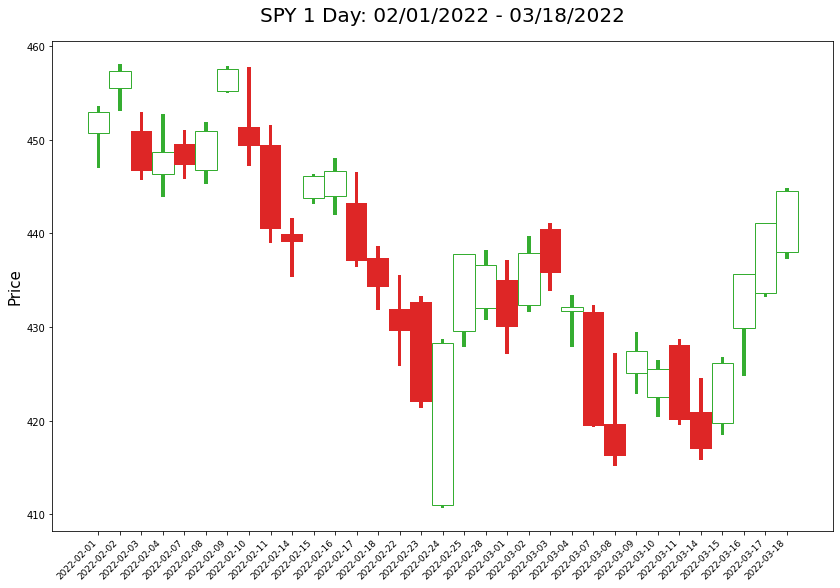

In [6]:
import yfinance as yf

#Define Variables
ticker = 'SPY'
timeframe = '1 Day'

#Download Data From yfinance
data = yf.download(ticker, start='2022-02-01', threads= False, progress = False)
data['date'] = pd.to_datetime(data.index)
data = data.loc[:,['Open', 'High', 'Low', 'Close']]
data.columns = ['open','high','low','close']

start = data.index[0].strftime('%m/%d/%Y')
end = data.index[-1].strftime('%m/%d/%Y')

#Creating the xaxis labels (this could be intigrated into the function as well)
xlabels = data.reset_index(drop=False)
ticks = list(xlabels.index)
labels = list(xlabels['Date'].dt.date)

#The axtual plotting
plt.rc('figure', figsize=(14.0, 9.0))
plot_candles(data)
plt.title('{} {}: {} - {}'.format(ticker,timeframe,start,end),pad = 20,fontdict={'size':20})
plt.ylabel('Price',fontdict={'size':15})
plt.yticks(size=10)
plt.xticks(ticks = ticks, labels = labels, rotation = 45,fontdict={'size':9,'ha':'right'})
plt.show()
